# Caffe学习系列：绘制loss和accuracy曲线

如同前几篇的可视化，这里采用的也是jupyter notebook来进行曲线绘制。

In [1]:
# 加载必要的库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, caffe
# 设置当前目录
caffe_root = '/root/Repository/caffe/'
sys.path.insert(0, caffe_root + 'python')
os.chdir(caffe_root)

设置求解器，和c++/caffe一样，需要一个solver配置文件。

In [2]:
# set the solver prototxt
solver = caffe.SGDSolver('examples/cifar10/cifar10_quick_solver.prototxt')

如果不需要绘制曲线，只需要训练出一个caffemodel，直接调用solver.solve()就可以了。如果要绘制曲线，就需要把迭代过程中的值保存下来，因此不能直接调用solver.solve()，需要迭代。在迭代过程中，每迭代200次测试一次：

In [3]:
%%time
niter = 4000
test_interval = 200
train_loss = np.zeros(niter)
test_acc = np.zeros(int(np.ceil(niter / test_interval)))

# the main solver loop
for it in range(niter):
    solver.step(1) # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    solver.test_nets[0].forward(start='conv1')
    
    if it % test_interval == 0:
        acc = solver.test_nets[0].blobs['accuracy'].data
        print('Iteration ', it , ' testing... ', 'accuracy: ', acc)
        test_acc[it // test_interval] = acc

('Iteration ', 0, ' testing... ', 'accuracy: ', array(0.19, dtype=float32))
('Iteration ', 200, ' testing... ', 'accuracy: ', array(0.33, dtype=float32))
('Iteration ', 400, ' testing... ', 'accuracy: ', array(0.45, dtype=float32))
('Iteration ', 600, ' testing... ', 'accuracy: ', array(0.56, dtype=float32))
('Iteration ', 800, ' testing... ', 'accuracy: ', array(0.58, dtype=float32))
('Iteration ', 1000, ' testing... ', 'accuracy: ', array(0.64, dtype=float32))
('Iteration ', 1200, ' testing... ', 'accuracy: ', array(0.61, dtype=float32))
('Iteration ', 1400, ' testing... ', 'accuracy: ', array(0.6, dtype=float32))
('Iteration ', 1600, ' testing... ', 'accuracy: ', array(0.68, dtype=float32))
('Iteration ', 1800, ' testing... ', 'accuracy: ', array(0.68, dtype=float32))
('Iteration ', 2000, ' testing... ', 'accuracy: ', array(0.7, dtype=float32))
('Iteration ', 2200, ' testing... ', 'accuracy: ', array(0.63, dtype=float32))
('Iteration ', 2400, ' testing... ', 'accuracy: ', array(0.64

绘制train过程中的loss曲线，和测试过程中的accuracy曲线。

[0.19       0.33000001 0.44999999 0.56       0.57999998 0.63999999
 0.61000001 0.60000002 0.68000001 0.68000001 0.69999999 0.63
 0.63999999 0.66000003 0.72000003 0.69999999 0.66000003 0.63999999
 0.67000002 0.70999998]


Text(0,0.5,u'test accuracy')

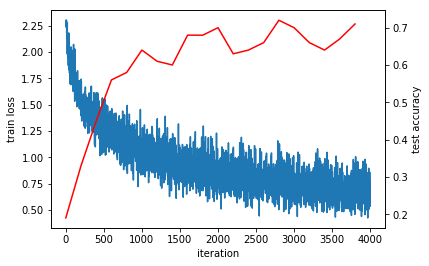

In [4]:
print(test_acc)
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')